<a href="https://colab.research.google.com/github/kushal721/NLP-Textual-Data-Analysis/blob/main/TextualData-NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/questions.csv'
data = pd.read_csv(file_path)

In [ ]:
print(data.head())

                                       Main Question
0  Are there information security requirements fo...
1         What is the password history before reuse?
2  What controls are in place for accessing produ...
3  Is this system developed and tested using secu...
4  What kind of AI is in use?\n- Deep Learning\n-...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

Similar questions


In [ ]:
# ensuring the dataset has 'Main Question' and dropping missing values
questions_list = data['Main Question'].dropna().tolist()

# importing libraries for text processing and similarity calculation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# converting questions into TF-IDF numerical features
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(questions_list)

# calculating similarity between all questions
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# function to find similar questions
def get_similar_questions(user_query, num_results=5):
    # converting the query into the TF-IDF vector space
    query_vector = vectorizer.transform([user_query])
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten() # calculating similarity scores with all questions
    # getting the top similar questions
    top_question_indices = similarity_scores.argsort()[-num_results:][::-1]
    return [(questions_list[idx], similarity_scores[idx]) for idx in top_question_indices]


sample_query = "Does this?"
similar_questions = get_similar_questions(sample_query)

print("Similar questions:")
for similar_question, score in similar_questions:
    print(f"{similar_question} (score: {score:.4f})")


Similar questions:
Does the supplier notify the entity of any vulnerabilities in its products or services promptly, ensuring it does not increase threat vectors? (score: 0.2794)
Does the solution require or impact any classified data? (score: 0.2519)
What approaches does the third party take to patching systems? (score: 0.2506)
Does your service delete data after a certain period? (score: 0.2441)
Does your solution support shared and personal devices? (score: 0.2441)


Categorize questions in 3 or more different topic areas you identify from the data

In [ ]:
# extracting questions from the dataset and removing missing values
questions = data['Main Question'].dropna().tolist()

# converting questions into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(questions)

# applying K-means clustering with a set number of clusters
num_clusters = 5  # Adjust this number based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# assigning each question to its respective cluster
cluster_labels = kmeans.labels_

# creating a DataFrame to pair questions with their assigned cluster
questions_df = pd.DataFrame({'Question': questions, 'Cluster': cluster_labels})

# printing questions grouped by their clusters
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num + 1}:")
    cluster_questions = questions_df[questions_df['Cluster'] == cluster_num]['Question'].tolist()
    for question in cluster_questions[:5]:  # showing 5 questions for each cluster
        print(f"- {question}")

# identifying the top terms for each cluster
terms = vectorizer.get_feature_names_out()

for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num + 1} - Top 10 Terms:")
    cluster_centroid = kmeans.cluster_centers_[cluster_num]
    top_terms_idx = cluster_centroid.argsort()[-10:][::-1]
    top_terms = [terms[i] for i in top_terms_idx]
    print(f"Top 10 terms: {', '.join(top_terms)}")



Cluster 1:
- Do you have a process to maintain oversight on your third parties, subcontractors, labor hire and recruitment agencies, franchisees, etc., adhering to all relevant labor laws? Please share details of the process.
- Regarding your General Liability insurance, please provide the following: 1) name of your carrier; 2) coverage level (both per occurrence and aggregate); and 3) confirmation that the policy is paid in full and currently in force.
- Do you provide an automated defect-tracking process for System changes and Enhancements?
- If you have a business continuity plan, on which frequency it's exercised and can you provide us with a summary of the results of the latest test?
- Please describe the company/user data you require to provide your service.

Cluster 2:
- Does your organization ensure that no live data, especially personal data, is used in test/development environments?
- Do you comply with any request from the client to delete personal data (which includes dele

Create a search function that can find relevant questions given a user query

In [ ]:

"""Finding similar question and search functions are similar so function from the find similar question is used here """

# asking user input
user_query = input("Please enter your query: ")

# getting similar questions
similar_questions = get_similar_questions(user_query)

print("\nRelevant questions based on your query:")
for q, score in similar_questions:
    print(f"{q} (score: {score:.4f})")


Please enter your query: has the client

Relevant questions based on your query:
Please confirm that the client data will be hosted in an environment dedicated to the client. (score: 0.5373)
How can the client obtain regular (quarterly) confirmation that backups are successful? Is there a portal that would tell the client? Would the client raise a support ticket each time? Is there some other way that the client can obtain verification that backups are successful? (score: 0.4529)
Has the vendor implemented appropriate controls to ensure that it and its personnel only use the client's data to the extent necessary to provide services to the client? (score: 0.3841)
Do you support an integrated experience?
a. The client provided logos, name, color, fonts, and tone of voice throughout the web and app platforms.
b. The client's brand name URLs
c. The client's branded digital (email & texts) and printed member outreach material
d. The client's branded App name and instance
e. Customized and p


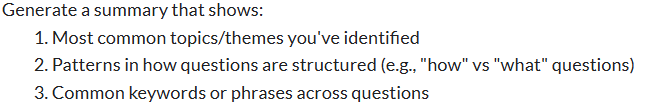


In [ ]:
# Converting the questions into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(questions)

# clustering the questions into groups using KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

data['Cluster'] = kmeans.labels_

# checking how the questions are distributed
cluster_counts = data['Cluster'].value_counts()

# identifying the main topics/themes for each cluster
feature_names = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

themes = {}
for cluster_id in range(num_clusters):
    top_terms = [feature_names[index] for index in order_centroids[cluster_id, :10]]  # Top 10 terms
    themes[f"Cluster {cluster_id + 1}"] = ", ".join(top_terms)

# analyzing how questions are structured
question_types = {'How': 0, 'What': 0, 'Why': 0, 'When': 0, 'Does': 0, 'Is': 0}
for question in questions:
    for q_type in question_types:
        if question.lower().startswith(q_type.lower()):
            question_types[q_type] += 1

# extracting the most common keywords
tfidf_array = tfidf_matrix.toarray()
terms = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_array.sum(axis=0)
keyword_scores = {terms[i]: tfidf_scores[i] for i in range(len(terms))}

# sorting keywords by their scores
sorted_keywords = sorted(keyword_scores.items(), key=lambda x: x[1], reverse=True)[:10]


print("\nSummary of Findings:")
# Post common topics/themes identified from clusters
print("\nMost common topics/themes:")
for cluster, terms in themes.items():
    print(f"{cluster}: {terms}")

# Patterns in how questions are structured
print("\nPatterns in question structure:")
for q_type, count in question_types.items():
    print(f"{q_type} questions: {count}")

# Common keywords or phrases across all questions
print("\nTop 10 most common keywords/phrases:")
for keyword, score in sorted_keywords:
    print(f"{keyword}: {score:.4f}")



Summary of Findings:

Most common topics/themes:
Cluster 1: provide, details, data, password, locations, stored, privacy, process, frequency, country
Cluster 2: data, access, client, backup, systems, application, delete, development, does, encrypted
Cluster 3: security, network, information, implemented, organization, controls, requirements, does, device, systems
Cluster 4: does, organization, information, company, personal, solution, management, application, employees, access
Cluster 5: client, use, services, vendor, ensure, ai, provide, data, does, provided

Patterns in question structure:
How questions: 8
What questions: 20
Why questions: 0
When questions: 1
Does questions: 39
Is questions: 27

Top 10 most common keywords/phrases:
data: 8.6937
does: 8.0532
client: 5.8522
provide: 5.4090
security: 5.3535
information: 5.0263
access: 4.4807
organization: 4.2925
application: 4.2687
process: 3.6676
